# Business Problem

Keterangan: **Ransi** adalah perusahaan travel insurance yang menjual produk nya melalui Online dan Offline untuk berbagai destinasi.
<br>
Perusahaan asuransi Ransi ingin meningkatkan pendapatan melalui targeted promotion kepada Customer yang dinilai "Premium" dengan cara menawarkan harga yang masih Premium namun tetap kompetitf. Oleh karena itu, perusahaan membutuhkan model machine learning yang dapat merumuskan target customer yang dituju yaitu: 
<br>
1. Premium: Net sales yang tinggi berdasarkan proffiling dan kebutuhan Customer
<br>
2. Persentase klaim kecil

In [138]:
#data frame
import pandas as pd
import numpy as np

#visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statsmodels.api as sm


#modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


#metrics
from sklearn.metrics import accuracy_score

In [139]:
df=pd.read_csv('data_travel_insurance.csv')
df.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


# Data Understanding

In [140]:
print(f'Jumlah baris dan kolom yang ada pada data ini adalah {df.shape}')
df.info()

Jumlah baris dan kolom yang ada pada data ini adalah (44328, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


`Gender` adalah satu satunya column yang memiliki missing value dan dengan tingginya missing value yang ada kemungkinan column `Gender` akan di hapus pada data cleaning

## Numerik

In [141]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


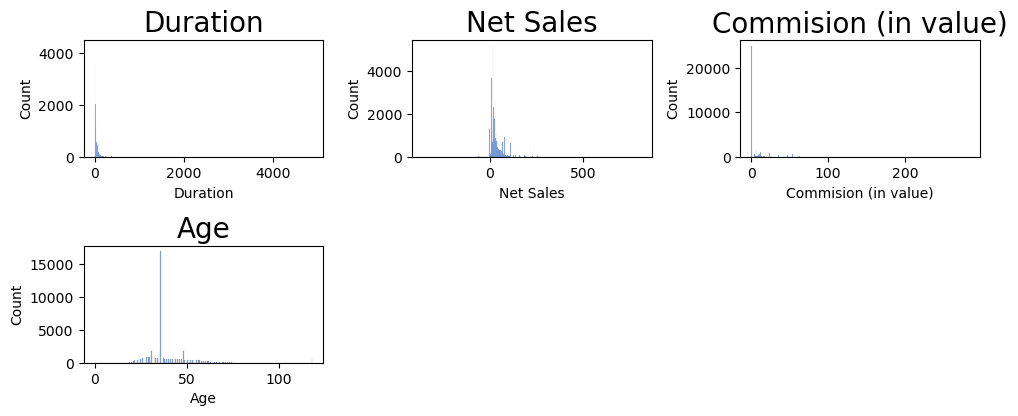

In [142]:
plt.figure(figsize=(10, 10))
plotnumber = 1
num_features = df.select_dtypes(include='number').columns

for feature in num_features:
    ax = plt.subplot(5, 3, plotnumber)
    sns.histplot(data=df,x=feature,color='cornflowerblue')
    plt.title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout()

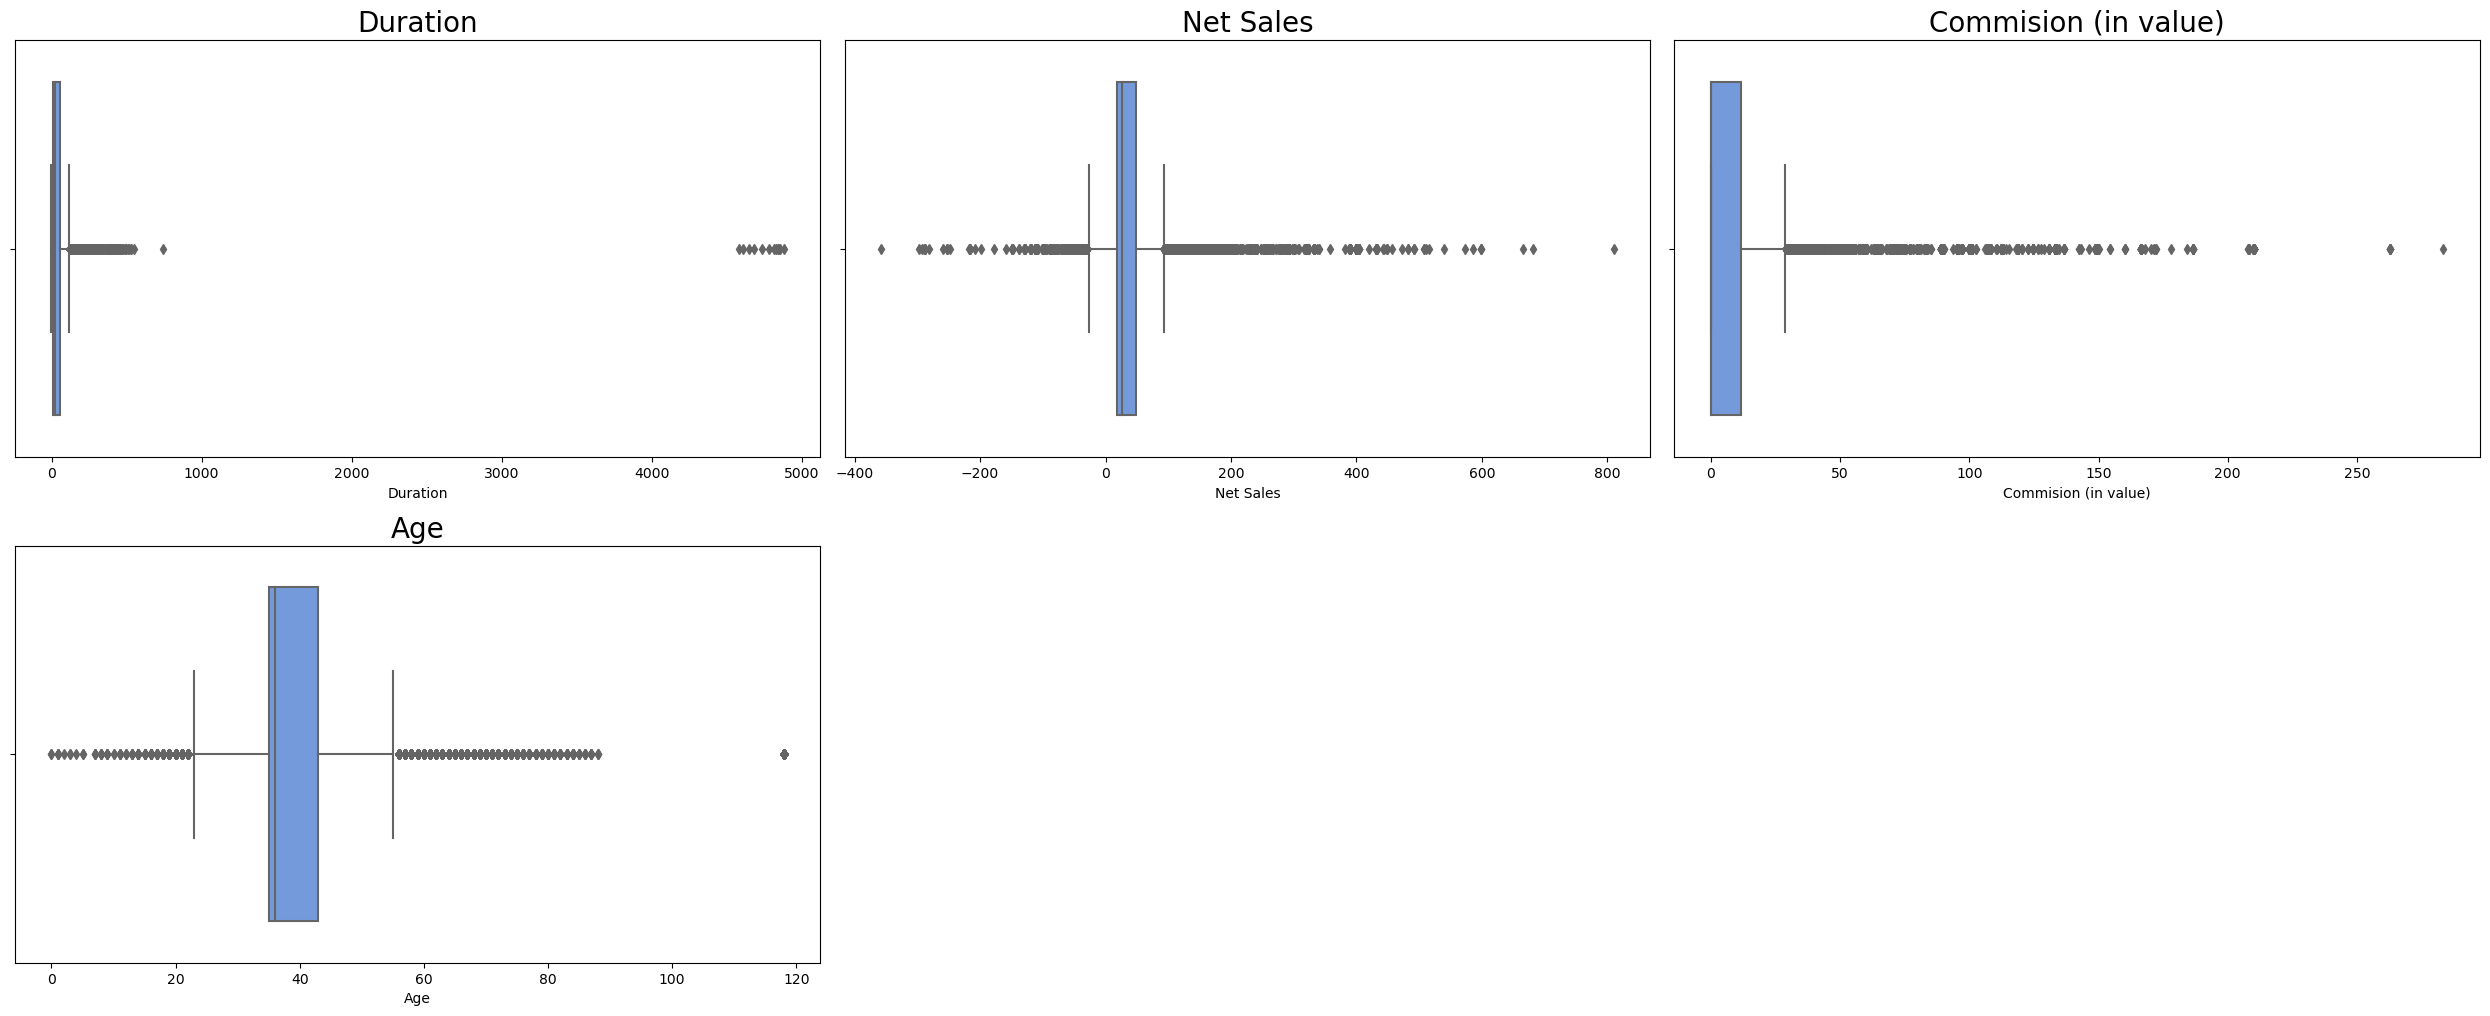

In [143]:
plt.figure(figsize=(25, 25))
plotnumber = 1
num_features = df.select_dtypes(include='number').columns

for feature in num_features:
    ax = plt.subplot(5, 3, plotnumber)
    sns.boxplot(data=df,x=feature,color='cornflowerblue')
    plt.title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout()

Melalui deskripsi dan grafik dapat dilihat adanya abnormalitas pada data tersebut seperti:
<br>
1. Duration: adanya data yang kurang dari 0 & lebih tinggi dari 4000
<br>
2. Net Sales:kurang dari 0
<br>
3. Age: umur 118 tahun


#### Duration 

In [144]:
df[['Destination','Duration','Age','Net Sales','Agency Type','Agency','Claim']][df['Duration']<0]

,Destination,Duration,Age,Net Sales,Agency Type,Agency,Claim
26228,MALAYSIA,-1,118,18.0,Airlines,JZI,No
26494,BRUNEI DARUSSALAM,-1,118,18.0,Airlines,JZI,No


`Duration` hanya memiliki 2 data yang berisi -1, kemungkinan data ini adalah kesalahan pengisian dan akan diperbaiki pada saat data cleaning

#### Net Sales

In [145]:
df[['Destination','Duration','Age','Net Sales','Agency Type','Agency','Claim']][df['Net Sales']<=-200]

,Destination,Duration,Age,Net Sales,Agency Type,Agency,Claim
94,SINGAPORE,365,36,-216.75,Airlines,C2B,No
4458,UNITED ARAB EMIRATES,52,31,-287.10,Travel Agency,CWT,No
7024,NEW ZEALAND,127,41,-207.90,Travel Agency,CWT,No
9471,SINGAPORE,419,34,-252.85,Airlines,C2B,No
10563,SINGAPORE,158,22,-281.00,Airlines,C2B,No
13177,SINGAPORE,366,65,-287.40,Airlines,C2B,No
18466,AUSTRALIA,65,34,-297.00,Travel Agency,CWT,No
20137,SINGAPORE,176,24,-357.50,Airlines,C2B,No
22579,SINGAPORE,367,31,-216.00,Airlines,C2B,No
23738,UNITED KINGDOM,233,41,-217.80,Travel Agency,CWT,No


In [146]:
df[['Destination','Duration','Age','Net Sales','Agency Type','Agency','Claim']][df['Destination']=='SINGAPORE'][df['Agency Type']=='Airlines'][df['Duration']==365][df['Age']==36]

C:\Users\rosa\AppData\Local\Temp\ipykernel_18016\3430438059.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[['Destination','Duration','Age','Net Sales','Agency Type','Agency','Claim']][df['Destination']=='SINGAPORE'][df['Agency Type']=='Airlines'][df['Duration']==365][df['Age']==36]


,Destination,Duration,Age,Net Sales,Agency Type,Agency,Claim
94,SINGAPORE,365,36,-216.75,Airlines,C2B,No
5455,SINGAPORE,365,36,289.00,Airlines,C2B,No
16287,SINGAPORE,365,36,216.00,Airlines,C2B,No
16378,SINGAPORE,365,36,216.00,Airlines,C2B,No
20914,SINGAPORE,365,36,252.85,Airlines,C2B,No
22187,SINGAPORE,365,36,193.20,Airlines,C2B,No
25916,SINGAPORE,365,36,252.85,Airlines,C2B,Yes
30082,SINGAPORE,365,36,161.00,Airlines,C2B,No
30670,SINGAPORE,365,36,202.30,Airlines,C2B,No
40159,SINGAPORE,365,36,216.75,Airlines,C2B,No


Data Singapore memiliki banyak nilai minus dan setelah melalui analisa lebih lanjut, nilai net sales yang minus tidak mengartikan apapun dalam data tersebut. Contoh pada baris 94, nilai `Net Sales` adalah -216.75 sedangkan pada baris 40159 yang memiliki variable yang sama pada `Destination`, `Duration`, `Age`, `Agency Type`, `Agency`, dan `Claim` memiliki nilai `Net Sales` 216.75

Data `Net Sales` akan diberikan nilai absolut pada process **Data Cleaning**

#### Age

In [147]:
df[['Destination','Duration','Age','Net Sales','Agency Type','Agency','Claim']][df['Age']>100]

,Destination,Duration,Age,Net Sales,Agency Type,Agency,Claim
99,MALAYSIA,7,118,29.0,Airlines,ART,No
105,INDONESIA,16,118,37.0,Airlines,JZI,No
363,INDIA,12,118,39.0,Airlines,JWT,No
373,INDIA,6,118,39.0,Airlines,JWT,No
727,INDIA,76,118,100.0,Airlines,JWT,No
...,...,...,...,...,...,...,...
44089,INDIA,42,118,31.0,Airlines,JWT,No
44140,INDIA,84,118,93.0,Airlines,JWT,No
44150,INDIA,5,118,39.0,Airlines,JWT,No
44160,INDIA,0,118,31.0,Airlines,JWT,No


Data `Age` yang melebihi 100 menunjukkan banyaknya data berumur 118 tahun. Hal ini mungkin dapat disebabkan adanya sistem default pada computer yaitu 1/1/1900 saat memasukan tanggal yang disebabkan oleh human error atau adanya distribution channel/agency yang tidak mengambil tanggal lahir customer

## Kategorik 

In [148]:
df.describe(exclude='number')

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


Data travel insurance memiliki 7 column kategorik yang memungkinkan bahwa data tersebut memiliki pengaruh yang kuat kepada `Net Sales`/`Claim`

# Data Cleaning

In [149]:
df['Net Sales'] = np.abs(df['Net Sales'])
premium=df.copy()
cust_claim=df.copy()

In [150]:
premium.describe() #target customer Net Sales Spending 49.50-810 dollars

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,41.859638,9.707692,39.925600
std,109.153961,47.540877,19.625637,13.954926
min,-1.000000,0.000000,0.000000,0.000000
25%,9.000000,18.500000,0.000000,35.000000
50%,22.000000,27.000000,0.000000,36.000000
75%,53.000000,49.500000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


# Data Pre-Processing

untuk age ikutin aja yg di kids,adult, senior
untuk data pre-processing pake aja data yg sama df_dummy
pake 2 cara untuk identifikasi kira2 org ini akan klaim/nggak--> pake data yg beneran cuma high value cust yg klaim... atau semua org
---> kelemahan klo gak nyambung...perlu buat sistem lagi untuk identifikasi harus 1(high value) dan 0(claim)--> mungkin ini sudah sebuah limitasi.... 
---> kelebihan klo nyambung... no need another system udh kefilter dan tiggal ambil pokoknya claim nya 0 atau nggak, lebih targeted tpi kelemahannya lebih rendah tingkat akurasinya....

In [151]:
def NetSales_convert(NetSales):
    result = ''
    if(NetSales <= 49.4):
        result = 0
    else:
        result = 1
   
    return result

Setelah Net Sales di adjust menggunakan absolut, kita dapat menentukan bahwa customer yang di definisikan sebagai premium adalah customer yang berada pada Q3 dan keatas $49.50-810. Oleh karena itu kita akan definisikan **Customer Premium sebagai 1* dan **Customer normal sebagai 0**

In [152]:
# Fungsi untuk data pre_processing customer premium

def data_pre_processing(premium):
    # Membuat nilai Net Sales menjadi 0 dan 1
    premium['Net Sales'] = premium['Net Sales'].map(lambda x: NetSales_convert(x))

    # Menghapus kolom Gender
    premium.drop('Gender',axis =1, inplace=True)
    
    # Durasi yang memiliki nilai kurang dari nol akan diisi oleh angka median
    premium['Duration'][premium['Duration'] < 0] = premium['Duration'].median()
    
    # Durasi untuk asuransi travelling sepantasnya tidak mencapai angka 4000 lebih, oleh karena itu kita akan mengambil 
    # maksimal 2 tahun dan menggangap tahun kedua adalah tahun kabisat
    premium['Duration'][premium['Duration'] > 731] = 731
    
    #Mengubah angka 118 menggunakan angka rata-rata umur
    premium['Age'][premium['Age'] >100] = premium['Age'].mean()
    
    premium['Agency Type']=np.where(premium['Agency Type']=='Airlines',1,0)
    premium['Distribution Channel']=np.where(premium['Distribution Channel']=='Online',1,0)
    premium['Claim']=np.where(premium['Claim']=='Yes',1,0)

In [153]:
data_pre_processing(premium)

C:\Users\rosa\AppData\Local\Temp\ipykernel_18016\3136014804.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premium['Duration'][premium['Duration'] < 0] = premium['Duration'].median()
C:\Users\rosa\AppData\Local\Temp\ipykernel_18016\3136014804.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premium['Duration'][premium['Duration'] > 731] = 731
C:\Users\rosa\AppData\Local\Temp\ipykernel_18016\3136014804.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

### Identifikasi kemungkinan claim 

In [154]:
# Identifikasi kemungkinan customer claim

def data_pre_processing(cust_claim):

    # Menghapus kolom Gender
    cust_claim.drop('Gender',axis =1, inplace=True)
    
    # Durasi yang memiliki nilai kurang dari nol akan diisi oleh angka median
    cust_claim['Duration'][cust_claim['Duration'] < 0] = cust_claim['Duration'].median()
    
    # Durasi untuk asuransi travelling sepantasnya tidak mencapai angka 4000 lebih, oleh karena itu kita akan mengambil 
    # maksimal 2 tahun dan menggangap tahun kedua adalah tahun kabisat
    cust_claim ['Duration'][cust_claim['Duration'] > 731] = 731
    
    #Mengubah angka 118 menggunakan angka rata-rata umur
    cust_claim['Age'][cust_claim['Age'] >100] = cust_claim['Age'].mean()
    
    cust_claim['Agency Type']=np.where(cust_claim['Agency Type']=='Airlines',1,0)
    cust_claim['Distribution Channel']=np.where(cust_claim['Distribution Channel']=='Online',1,0)
    cust_claim['Claim']=np.where(cust_claim['Claim']=='Yes',1,0)
    
    

In [155]:
data_pre_processing(cust_claim)

C:\Users\rosa\AppData\Local\Temp\ipykernel_18016\743890012.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim['Duration'][cust_claim['Duration'] < 0] = cust_claim['Duration'].median()
C:\Users\rosa\AppData\Local\Temp\ipykernel_18016\743890012.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim ['Duration'][cust_claim['Duration'] > 731] = 731
C:\Users\rosa\AppData\Local\Temp\ipykernel_18016\743890012.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

Untuk mempersingkat processing, kita akan mengubah data yang hanya memiliki 2 value menjadi 0 dan 1

# Explanatory Data Analysis

C:\Users\rosa\AppData\Local\Temp\ipykernel_18016\3329510137.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(premium.corr(),annot=True)


<Axes: >

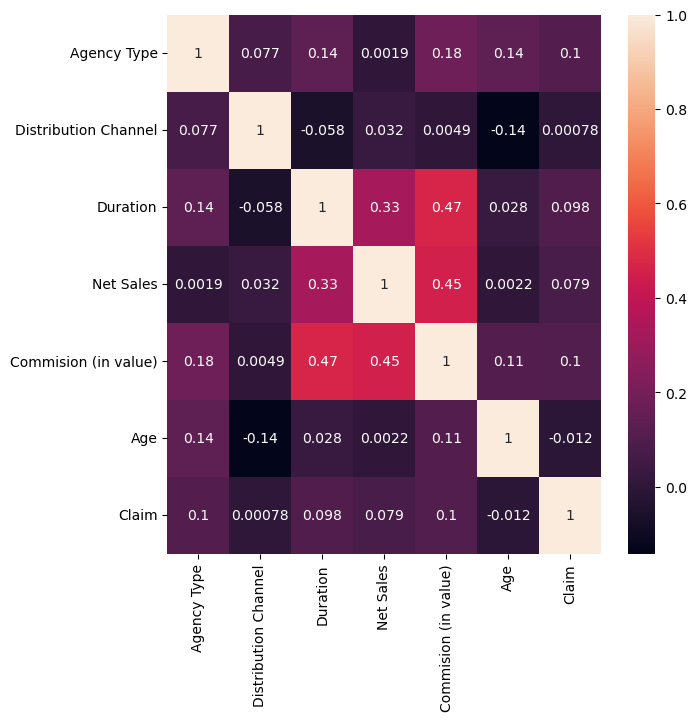

In [156]:
plt.figure(figsize=(7,7))
sns.heatmap(premium.corr(),annot=True)

C:\Users\rosa\AppData\Local\Temp\ipykernel_18016\137849448.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cust_claim.corr(),annot=True)


<Axes: >

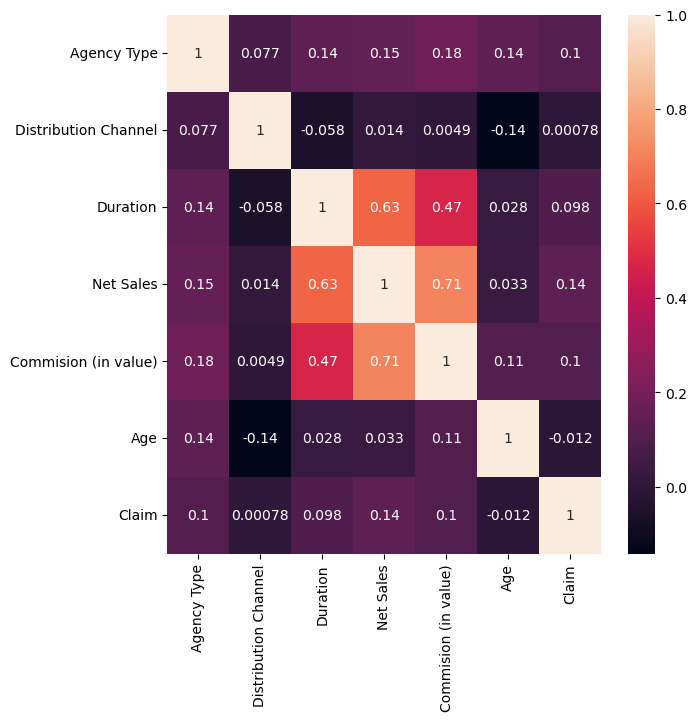

In [157]:
plt.figure(figsize=(7,7))
sns.heatmap(cust_claim.corr(),annot=True)

### Agencies dengan rata-rata Net Sales dan Claim Terbanyak

In [158]:
netsales_mean = (premium.groupby('Agency', as_index=False)['Net Sales'].mean()).nlargest(10,'Net Sales')
netsales_mean

,Agency,Net Sales
15,TTW,1.000000
0,ADM,0.763636
11,LWC,0.474725
6,CWT,0.439465
8,JWT,0.406130
10,KML,0.405694
2,C2B,0.403789
7,EPX,0.200032
1,ART,0.192140
9,JZI,0.108504


In [159]:
Claim_mean = (cust_claim.groupby('Agency', as_index=False)['Claim'].mean()).nlargest(10,'Claim')
Claim_mean

,Agency,Claim
2,C2B,0.070746
11,LWC,0.063736
10,KML,0.017794
4,CCR,0.015873
5,CSR,0.014706
3,CBH,0.014493
15,TTW,0.014493
6,CWT,0.010702
8,JWT,0.007663
13,SSI,0.006536


LWC adalah satu satunya agency yang membawa `Net Sales` tinggi tapi juga `Claim` yang tinggi

### Product Name dengan rata-rata Net Sales dan Claim terbanyak

In [160]:
premium.pivot_table(index = ['Product Name'], values = ['Net Sales'], aggfunc = 'mean').nlargest(10,'Net Sales')

,Net Sales
Product Name,
Annual Travel Protect Gold,1.000000
Annual Travel Protect Platinum,1.000000
Child Comprehensive Plan,1.000000
Individual Comprehensive Plan,1.000000
Spouse or Parents Comprehensive Plan,1.000000
Annual Silver Plan,0.983590
Annual Travel Protect Silver,0.949153
Annual Gold Plan,0.943662
Gold Plan,0.637131


In [161]:
cust_claim.pivot_table(index = ['Product Name'], values = ['Claim'], aggfunc = 'mean').nlargest(10,'Claim')

,Claim
Product Name,
Annual Gold Plan,0.112676
Annual Silver Plan,0.111795
Annual Travel Protect Gold,0.111111
Single Trip Travel Protect Platinum,0.106383
Spouse or Parents Comprehensive Plan,0.076923
Silver Plan,0.069588
Annual Travel Protect Silver,0.067797
Annual Travel Protect Platinum,0.058824
Bronze Plan,0.056902


Melalui data ini kita dapat melihat bahwa produk-produk yang memiliki Net Sales tinggi seperti "Annual Travel Protect Gold" dan "Annual Travel Protect Platinum" bukanlah produk yang memiliki top 3 Claim, sehingga masih banyak possibility untuk menargetkan customer yang membeli top 3 Net Sales Tertinggi

# Destination with maximum Value.

In [162]:
# Finding the Agencies with the Maximum Claims

Destination_mean = (premium.groupby('Destination', as_index=False)['Net Sales'].mean()).nlargest(10,'Net Sales')
Destination_mean

,Destination,Net Sales
14,BOTSWANA,1.0
19,CAMEROON,1.0
21,CAYMAN ISLANDS,1.0
30,DOMINICAN REPUBLIC,1.0
35,FAROE ISLANDS,1.0
39,FRENCH POLYNESIA,1.0
47,GUINEA-BISSAU,1.0
48,GUYANA,1.0
58,JAMAICA,1.0
66,KYRGYZSTAN,1.0


In [163]:
# Finding the Agencies with the Maximum Claims

Destination_mean2 = (cust_claim.groupby('Destination', as_index=False)['Claim'].mean()).nlargest(10,'Claim')
Destination_mean2

,Destination,Claim
25,COSTA RICA,0.250000
28,CZECH REPUBLIC,0.046512
110,SINGAPORE,0.044998
51,ICELAND,0.037975
56,ISRAEL,0.030303
57,ITALY,0.018987
124,TURKEY,0.018182
112,SOUTH AFRICA,0.017699
38,FRANCE,0.017595
130,UNITED STATES,0.016638


`Net Sales` tertinggi di dominasi oleh negara dunia ketiga, yang hanya dikunjungi oleh orang yang _Well-Travelled_ sedangkan dan biasa dinilai tidak aman karena kurangnya infrasturktur yang baik. Uniknya negara dunia ketiga ini tidak ada yang masuk pada "TOP Claim", dan claim terbanyak dilakukan oleh customer yang mengunjungi negara yang maju dan sering dikunjungi turis.

# Feature Engineering

In [164]:
def feature_processing(encoding):
    # Converting all categorical columns into numeric using frequency encoding, label encoding and one-hot encoding.
    fe = encoding.groupby('Destination').size()/len(encoding)
    encoding.loc[:,'Dest_fe'] = encoding['Destination'].map(fe)
    fe_1 = encoding.groupby('Agency').size()/len(encoding)
    encoding.loc[:,'Agency_fe'] = encoding['Agency'].map(fe_1)
    fe_2 = encoding.groupby('Product Name').size()/len(encoding)    
    encoding.loc[:,'Product Name_fe'] = encoding['Product Name'].map(fe_2)
    encoding.drop(columns='Agency',axis=1,inplace=True)
    encoding.drop(columns='Destination',axis=1,inplace=True)
    encoding.drop(columns='Product Name',axis=1,inplace=True)

###  Net Sales Data

In [165]:
feature_processing(premium)

In [166]:
premium.head(5)

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Claim,Dest_fe,Agency_fe,Product Name_fe
0,1,1,365,1,54.0,57.0,0,0.209055,0.129783,0.021995
1,0,1,4,0,0.0,33.0,0,0.093372,0.556217,0.292795
2,1,1,19,0,7.7,26.0,0,0.035463,0.100005,0.086492
3,0,1,20,1,0.0,59.0,0,0.039321,0.556217,0.210725
4,1,1,8,0,4.0,28.0,0,0.209055,0.129783,0.064226


In [167]:
X = premium.drop(['Net Sales','Claim'], axis = 1)
y = premium['Net Sales']

In [168]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold,cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#### Train Test Split 

In [169]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,
    y, 
    stratify=y,  
    train_size = 0.2,
    random_state = 2020
)

In [170]:
 X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval, 
    stratify=y_trainval,  
    test_size = 0.2,
    random_state = 2020
)

#### Random Forest Classifier

In [171]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.8906747878070101
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     26595
           1       0.81      0.74      0.77      8868

    accuracy                           0.89     35463
   macro avg       0.86      0.84      0.85     35463
weighted avg       0.89      0.89      0.89     35463



###### Random Forest-Cross Validation (Over Sampler) 

In [172]:
ros = RandomOverSampler()

pipe_model=Pipeline([
    ('balance',ros),
    ('cif',rf)
])
skf=StratifiedKFold(n_splits=5) 
rf_ros_cv=cross_val_score(pipe_model,X_trainval,y_trainval, cv=skf, scoring='f1')
print('Hasil Cross Validasi',rf_ros_cv)
print('rata-rata skor validasii',rf_ros_cv.mean())
print('standar deviasi skor validasi',rf_ros_cv.std())

Hasil Cross Validasi [0.77391304 0.76065574 0.73637375 0.76211454 0.74807481]
rata-rata skor validasii 0.7562263749436854
standar deviasi skor validasi 0.01286610104443948


In [173]:
from sklearn.metrics import confusion_matrix
pipe_model.fit(X_train,y_train)
y_pred =rf.predict(X_test)
cmb = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n',cmb)
print('Classification Report: \n',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[24038  2557]
 [ 2013  6855]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     26595
           1       0.73      0.77      0.75      8868

    accuracy                           0.87     35463
   macro avg       0.83      0.84      0.83     35463
weighted avg       0.87      0.87      0.87     35463



<Axes: >

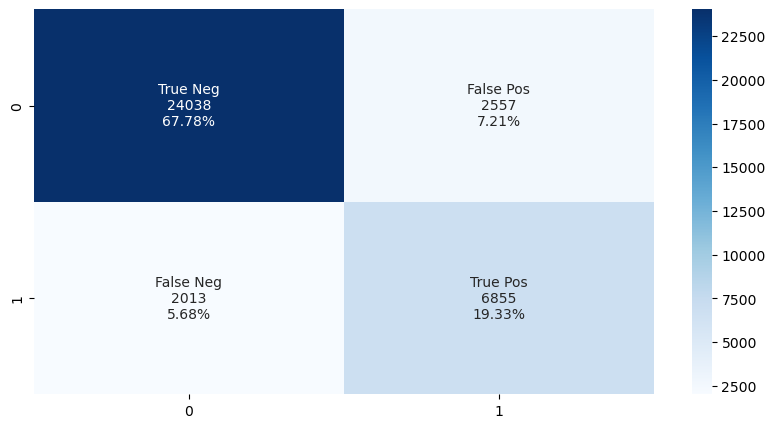

In [174]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmb.flatten()/np.sum(cmb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 5))
sns.heatmap(cmb, annot=labels, fmt='', cmap='Blues')

Hasil test model menunnjukkan bahwa prediksi 1 yang tidak benar ada pada 6.53%

##### Tunning 

In [175]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [176]:
max_depth = list(np.arange(1, 101))
n_estimators = list(np.arange(1, 101)) 
criterion = ['gini', 'entropy']
min_samples_split = [2]
min_samples_leaf = [1]

hyperparam_space_rf = {
    'model__max_depth': max_depth,
    'model__n_estimators': n_estimators,
    'model__criterion': criterion,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf
}

In [177]:
xgb=XGBClassifier(random_state=2020)
estimator_xgb=Pipeline([
    ('balance',ros),
    ('model',xgb)
])
crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

param_rf = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_rf,
    n_iter=50,
    cv = crossval,
    scoring = 'recall', 
    n_jobs = -1, 
    verbose = 1
    )

In [178]:
param_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\rosa\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:02:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2020, shuffle=True),
                   estimator=Pipeline(steps=[('balance', RandomOverSampler()),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=N...
                   param_distributions={'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'model__min_samples_leaf': [1],
                                        'model__min_samples_split': [2],
                                        'model__n_estimators': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9, 10,
                                                                11, 12, 13, 14,
                                                                15, 16, 17, 18,
                                                                19, 20, 21, 22,
                                                                23, 24, 25, 26,
                                                                27, 28, 29, 30, ...]},
                   scoring='recall', verbose=1)

In [179]:
predictions = rf.predict(X_test)

In [180]:
accuracy = accuracy_score(y_test, predictions)
print('Tingkat kearkurasian setelah tunning adalah',accuracy)

Tingkat kearkurasian setelah tunning adalah 0.8711332938555678


In [181]:
from sklearn.metrics import confusion_matrix
pipe_model.fit(X_train,y_train)
y_pred =rf.predict(X_test)
cmb = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n',cmb)
print('Classification Report: \n',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[24004  2591]
 [ 1995  6873]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     26595
           1       0.73      0.78      0.75      8868

    accuracy                           0.87     35463
   macro avg       0.82      0.84      0.83     35463
weighted avg       0.87      0.87      0.87     35463



<Axes: >

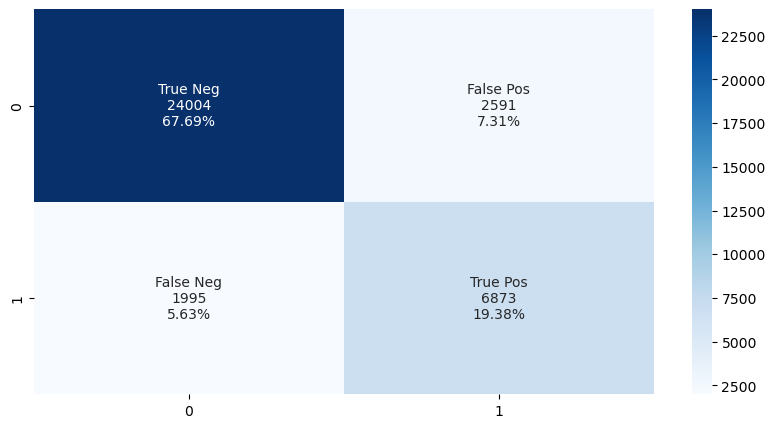

In [182]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmb.flatten()/np.sum(cmb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 5))
sns.heatmap(cmb, annot=labels, fmt='', cmap='Blues')

###### Random Forest- Cross Validation (Under Sampler)

In [183]:
# rus = RandomUnderSampler()

# pipe_model=Pipeline([
#     ('balance',rus),
#     ('cif',rf)
# ])
# skf=StratifiedKFold(n_splits=5) 
# rf_rus_cv=cross_val_score(pipe_model,X_trainval,y_trainval, cv=skf, scoring='f1')
# print('Hasil Cross Validasi',rf_rus_cv)
# print('rata-rata skor validasii',rf_rus_cv.mean())
# print('standar deviasi skor validasi',rf_rus_cv.std())

#### Logistic Reggression 

In [184]:
# logr1 = LogisticRegression()
# logr1.fit(X_train,y_train)
# y_pred = logr1.predict(X_test)
# print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     26595
           1       0.73      0.78      0.75      8868

    accuracy                           0.87     35463
   macro avg       0.82      0.84      0.83     35463
weighted avg       0.87      0.87      0.87     35463



###### Logisctic Regression-OverSampler

In [185]:
# ros = RandomOverSampler()

# pipe_model=Pipeline([
#     ('balance',ros),
#     ('cif',logr1)
# ])
# skf=StratifiedKFold(n_splits=5) 
# logr1_ros_cv=cross_val_score(pipe_model,X_trainval,y_trainval, cv=skf, scoring='f1')
# print(logr1_ros_cv)
# print(logr1_ros_cv.mean())
# print('Hasil Cross Validasi',logr1_ros_cv)
# print('rata-rata skor validasii',logr1_ros_cv.mean())
# print('standar deviasi skor validasi',logr1_ros_cv.std())

##### Logistic Reggression-Under Sampler

In [186]:
# rus = RandomUnderSampler()

# pipe_model=Pipeline([
#     ('balance',rus),
#     ('cif',logr1)
# ])
# skf=StratifiedKFold(n_splits=5) 
# logr1_rus_cv=cross_val_score(pipe_model,X_trainval,y_trainval, cv=skf, scoring='f1')
# print('Hasil Cross Validasi',logr1_rus_cv)
# print('rata-rata skor validasii',logr1_rus_cv.mean())
# print('standar deviasi skor validasi',logr1_rus_cv.std())

### Claim

In [187]:
feature_processing(cust_claim)

In [188]:
cust_claim.head(5)

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Claim,Dest_fe,Agency_fe,Product Name_fe
0,1,1,365,216.0,54.0,57.0,0,0.209055,0.129783,0.021995
1,0,1,4,10.0,0.0,33.0,0,0.093372,0.556217,0.292795
2,1,1,19,22.0,7.7,26.0,0,0.035463,0.100005,0.086492
3,0,1,20,112.0,0.0,59.0,0,0.039321,0.556217,0.210725
4,1,1,8,16.0,4.0,28.0,0,0.209055,0.129783,0.064226


#### Train-test Split

In [189]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X,
    y, 
    stratify=y, 
    train_size = 0.2, 
    random_state = 2020)

In [190]:
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval, 
    stratify=y_trainval, 
    train_size = 0.2, 
    random_state = 2020)

##### Random Forest Claim

In [191]:
rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)
y_pred_rf2 = rf2.predict(X_test)
print(accuracy_score(y_test, y_pred_rf2))
print(classification_report(y_test, y_pred_rf2))

0.8723740236302625
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     26595
           1       0.78      0.68      0.73      8868

    accuracy                           0.87     35463
   macro avg       0.84      0.81      0.82     35463
weighted avg       0.87      0.87      0.87     35463



##### Random Forest Claim-Oversample

In [192]:
ros = RandomOverSampler()

pipe_model=Pipeline([
    ('balance',ros),
    ('cif',rf2)
])
skf=StratifiedKFold(n_splits=5) 
rf2_ros_cv=cross_val_score(pipe_model,X_trainval,y_trainval, cv=skf, scoring='f1')
print('Hasil Cross Validasi',rf2_ros_cv)
print('rata-rata skor validasii',rf2_ros_cv.mean())
print('standar deviasi skor validasi',rf2_ros_cv.std())

Hasil Cross Validasi [0.76470588 0.76736494 0.74915636 0.76367615 0.74403471]
rata-rata skor validasii 0.7577876066247777
standar deviasi skor validasi 0.009358456184328076


In [193]:
from sklearn.metrics import confusion_matrix
pipe_model.fit(X_train,y_train)
y_pred =rf2.predict(X_test)
cmb = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n',cmb)
print('Classification Report: \n',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[24128  2467]
 [ 2404  6464]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     26595
           1       0.72      0.73      0.73      8868

    accuracy                           0.86     35463
   macro avg       0.82      0.82      0.82     35463
weighted avg       0.86      0.86      0.86     35463



<Axes: >

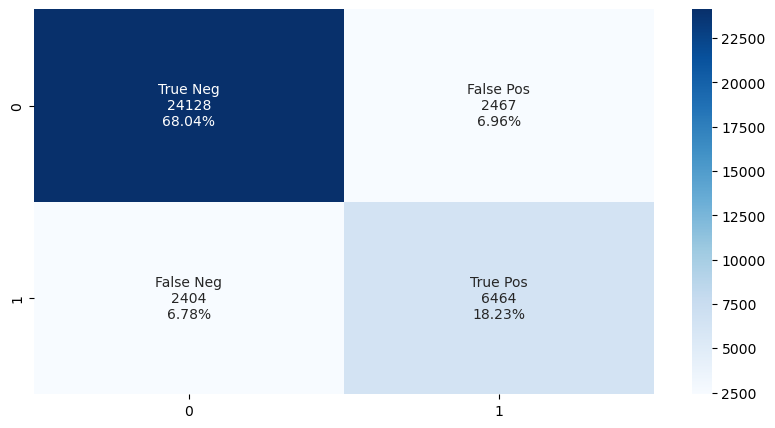

In [194]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmb.flatten()/np.sum(cmb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 5))
sns.heatmap(cmb, annot=labels, fmt='', cmap='Blues')

Hasil test model menunnjukkan bahwa prediksi 0 yang tidak benar ada pad 7.09%

##### Random Forest Claim-Undersample

In [195]:
# rus = RandomUnderSampler()

# pipe_model=Pipeline([
#     ('balance',rus),
#     ('cif',rf2)
# ])
# skf=StratifiedKFold(n_splits=5) 
# rf2_rus_cv=cross_val_score(pipe_model,X_trainval,y_trainval, cv=skf, scoring='f1')
# print('Hasil Cross Validasi',rf2_rus_cv)
# print('rata-rata skor validasii',rf2_rus_cv.mean())
# print('standar deviasi skor validasi',rf2_rus_cv.std())

##### Logistic Regression Claim

In [196]:
# logr2 = LogisticRegression()
# logr2.fit(X_train,y_train)
# y_pred = logr2.predict(X_test)
# print(accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

##### Log-Reg Oversample 

In [197]:
# ros = RandomOverSampler()

# pipe_model=Pipeline([
#     ('balance',ros),
#     ('cif',logr2)
# ])
# skf=StratifiedKFold(n_splits=5) 
# logr2_ros_cv=cross_val_score(pipe_model,X_trainval,y_trainval, cv=skf, scoring='f1')
# print('Hasil Cross Validasi',logr2_ros_cv)
# print('rata-rata skor validasii',logr2_ros_cv.mean())
# print('standar deviasi skor validasi',logr2_ros_cv.std())

##### Logreg-Undersample 

In [198]:
# rus = RandomUnderSampler()

# pipe_model=Pipeline([
#     ('balance',rus),
#     ('cif',logr2)
# ])
# skf=StratifiedKFold(n_splits=5) 
# logr2_rus_cv=cross_val_score(pipe_model,X_trainval,y_trainval, cv=skf, scoring='f1')
# print('Hasil Cross Validasi',logr2_rus_cv)
# print('rata-rata skor validasii',logr2_rus_cv.mean())
# print('standar deviasi skor validasi',logr2_rus_cv.std())

##### Tunning 

In [199]:
max_depth = list(np.arange(1, 101))
n_estimators = list(np.arange(1, 101)) 
criterion = ['gini', 'entropy']
min_samples_split = [2]
min_samples_leaf = [1]

hyperparam_space_rf = {
    'model__max_depth': max_depth,
    'model__n_estimators': n_estimators,
    'model__criterion': criterion,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf
}

In [200]:
xgb=XGBClassifier(random_state=2020)
estimator_xgb=Pipeline([
    ('balance',ros),
    ('model',xgb)
])
crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

param_rf = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_rf,
    n_iter=50,
    cv = crossval,
    scoring = 'recall', 
    n_jobs = -1, 
    verbose = 1
    )

In [201]:
param_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\rosa\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:02:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2020, shuffle=True),
                   estimator=Pipeline(steps=[('balance', RandomOverSampler()),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=N...
                   param_distributions={'model__criterion': ['gini', 'entropy'],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'model__min_samples_leaf': [1],
                                        'model__min_samples_split': [2],
                                        'model__n_estimators': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9, 10,
                                                                11, 12, 13, 14,
                                                                15, 16, 17, 18,
                                                                19, 20, 21, 22,
                                                                23, 24, 25, 26,
                                                                27, 28, 29, 30, ...]},
                   scoring='recall', verbose=1)

In [202]:
predictions2 = rf2.predict(X_test)

In [203]:
accuracy = accuracy_score(y_test, predictions2)
print('Tingkat kearkurasian setelah tunning adalah',accuracy)

Tingkat kearkurasian setelah tunning adalah 0.8626455742604968


In [204]:
from sklearn.metrics import confusion_matrix
pipe_model.fit(X_train,y_train)
y_pred =rf2.predict(X_test)
cmb = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n',cmb)
print('Classification Report: \n',classification_report(y_test,y_pred))

Confusion Matrix: 
 [[24068  2527]
 [ 2369  6499]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91     26595
           1       0.72      0.73      0.73      8868

    accuracy                           0.86     35463
   macro avg       0.82      0.82      0.82     35463
weighted avg       0.86      0.86      0.86     35463



<Axes: >

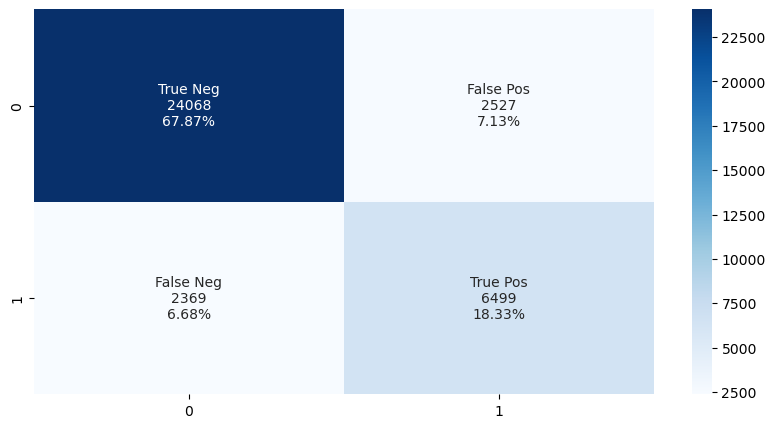

In [205]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmb.flatten()/np.sum(cmb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 5))
sns.heatmap(cmb, annot=labels, fmt='', cmap='Blues')

# Hasil Modelling

Berdasarkan hasil testing, dapat dilihat bahwa data Premium dan Data Cust_Claim memiliki kesamaan pada kecocokan modelling yaitu *Random Forest-Oversampling* dikarenakan adanya cross validation yang tinggi, yaitu 76% untuk keduanya, dan juga standard deviasi yang hanya 1 %

Melalui hasil tunning kita juga dapat melihat adanya tingkat akurasi yang tinggi yaitu, 87% untuk model premium dan 86% untuk model cust_claim.

Hasil dari testing yang sudah di tunning juga memiliki data false negative pada Premium customer yaitu 5.65% dan hasil false positive dari claim adalah 6.86%.
<br>
Dengan demikian chance bahwa model ini memiliki kesalahan dalam memprediksi 2 kondisi tersebut adalah 5.65%*6.86%=38%. 

Angka 38% terlihat tinggi bila digabungkan, karena adanya jawaban yang hanya 0 atau 1. Tetapi ketika angka ini tetap dibiarkan terpisah, dan dibantu oleh program lain dalam penentuannya.
Apabila:
<br>
**model 1=1, model 2=0--> muncul penawaran khusus**
<br>
model 1=0, model 2=0--> tidak muncul penawaran khusus
<br>
model 1=0, model 2=1-> tidak muncul penawaran khusus
<br>
model 1=0, model 2=0--> tidak muncul penawaran khusus

Maka keakurasian akan menjadi lebih tinggi, dengan masing-masing model hanya memiliki nilai di bawah 7% untuk kemungkinan false positive

Selain itu, data historikal menunjukkan bahwa hanya ada 3 persen dari jumlah customer premium yang mengajukan claim, sehingga hal ini adalah resiko yang rendah

In [206]:
premium.pivot_table(index=["Claim"],columns=["Net Sales"],values=["Age"],aggfunc='count')

Age       
Net Sales      0      1
Claim                  
0          32922  10729
1            321    356

# Cost Benefit Calculation

## Efek pemberian Discount

*Pemberian Diskon Claim:*
<br>
Customer Premium adalah mereka yang membayar asuransi dari harga 49.4 dollar hingga 810 dollar*
<br>
Dengan anggapan marketing memberikan diskon $10 dollar dan adanya peningkatan customer adalah 20% dari historikal
<br> 
Marketing tetap tidak mengeluarkan cost apapun tetapi mengurangi profit yang seharusnya di dapatkan oleh perusahaan

In [207]:
premium.pivot_table(columns=["Net Sales"],values=["Age"],aggfunc='count')

Net Sales,0,1
Age,33243,11085


Original Revenue from customer premium (lowest) = 11,085*49.50= 547,599
<br>
Original Revenue from customer premium (highest)= 11,085*810=8,978,850
<br>
<br>
20%+premium customer from marketing program=2217
<br>
Revenue from Promo (lowest)=547,599+(2217*39.50)=635,170.5
<br>
revenue from promo (highest)=8,979,850+(554*800)=10,752,450
<br>
<br>
Dengan penerapan marketing ini kepada market, kemungkinan marketing dapat memberikan penambahan revenue sebesar 15%-19% kepada perusahaan 


Namun marketing memiliki resiko pengurangan budget bila machine learning memberikan jawaban yang salah yaitu
<br>
budget*6.5% (false negative)

# Efek penentuan Claim yang salah

Apabila customer premium melakukan klaim, company harus mengeluarkan cost 2 hingga 3 kali dari harga asuransi itu sendiri

Cost yang di resiko kan adalah *Cost Claim* 7.09% (false positive)

# Save Model

In [208]:
import pickle

In [209]:
#save model
filename='rf'
pickle.dump(rf,open(filename,'wb'))


In [210]:
#load model
filename='rf'
loaded_model=pickle.load(open(filename,'rb'))


In [211]:
loaded_model

RandomForestClassifier()

In [212]:
filename2='rf2'
pickle.dump(rf2,open(filename2,'wb'))

In [213]:
 
filename2='rf2'
loaded_model2=pickle.load(open(filename2,'rb'))

In [214]:
 loaded_model2

RandomForestClassifier()

# Summary

Data memiliki limitasi karena tidak dapat memprediksi target market secara langsung dalam 1 model:
<br> 
1. model 1 harus menunjukan bahwa customer termasuk _premium_--> model memprediksi customer memiliki angka *1*
<br>
2. model 2 harus menunjukan bahwa customer memiliki kemungkinan rendah untuk klaim-->--> model memprediksi customer memiliki angka *0*

Apabila:
<br>
**model 1=1, model 2=0--> muncul penawaran khusus**
<br>
model 1=0, model 2=0--> tidak muncul penawaran khusus
<br>
model 1=0, model 2=1-> tidak muncul penawaran khusus
<br>
model 1=0, model 2=0--> tidak muncul penawaran khusus

Berdasarkan testing kita juga dapat melihat bahwa model yang paling tepat diterapkan adalah
<br>
model 1= Random Forest menggunakan oversampling sebagai crossdvalidation
<br>
model 2= Random Forest menggunakan oversampling sebagai crossdvalidation
<br>
